# Visual Studio Code - Python Data Science Tutorial

https://code.visualstudio.com/docs/python/data-science-tutorial

Import modules and load data

Data source: http://biostat.mc.vanderbilt.edu/wiki/pub/Main/DataSets/titanic.html  
Data info: http://biostat.mc.vanderbilt.edu/wiki/pub/Main/DataSets/titanic3info.txt  
OpenML: https://www.openml.org/d/40945

In [22]:
import pandas as pd
import numpy as np

data = pd.read_csv('titanic.csv')

Examine the data type of each property in the data set.

Property | Description | Values
---------|-------------|-------
`pclass` | Passenger Class | 1 = 1st; 2 = 2nd; 3 = 3rd
`survival` | Survival | 0 = No; 1 = Yes
`name` | Name | 
`sex` | Sex | 
`age` | Age | 
`sibsp` | Number of Siblings / Spouses Aboard | 
`parch` | Number of Parents / Children Aboard | 
`ticket` | Ticket Number | 
`fare` | Passenger Fare | Pre-1970 British Pounds
`cabin` | Cabin | 
`embarked` | Port of Embarkation | C = Cherbourg; Q = Queenstown; S = Southampton
`boat` | Lifeboat | 
`body` | Body Identification Number | 
`home.dest` | Home / Destination

**Definitions for `sibsp` and `parch`**  
Sibling: Borther, Sister, Stebrother, or Stepsister of passenger aboard Titanic  
Spouse: Husband or Wife of passenger aboard Titanic (Mistresses and Fiances ignored)  
Parent: Mother or Father of passenger aboard Titanic  
Child: Son, Daughter, Stepson, or Stepdaughter of passenger aboard Titanic

In [23]:
data.dtypes

pclass        int64
survived      int64
name         object
sex          object
age          object
sibsp         int64
parch         int64
ticket       object
fare         object
cabin        object
embarked     object
boat         object
body         object
home.dest    object
dtype: object

Ensure that unknown data is replaced with an appropriate type, and format the `age` and `fare` properties from `object` to `float64`

In [24]:
data.replace('?', np.nan, inplace= True)
data = data.astype({"age": np.float64, "fare": np.float64})

View how certain columns of the dataset relate to survivability.

<AxesSubplot:xlabel='survived', ylabel='fare'>

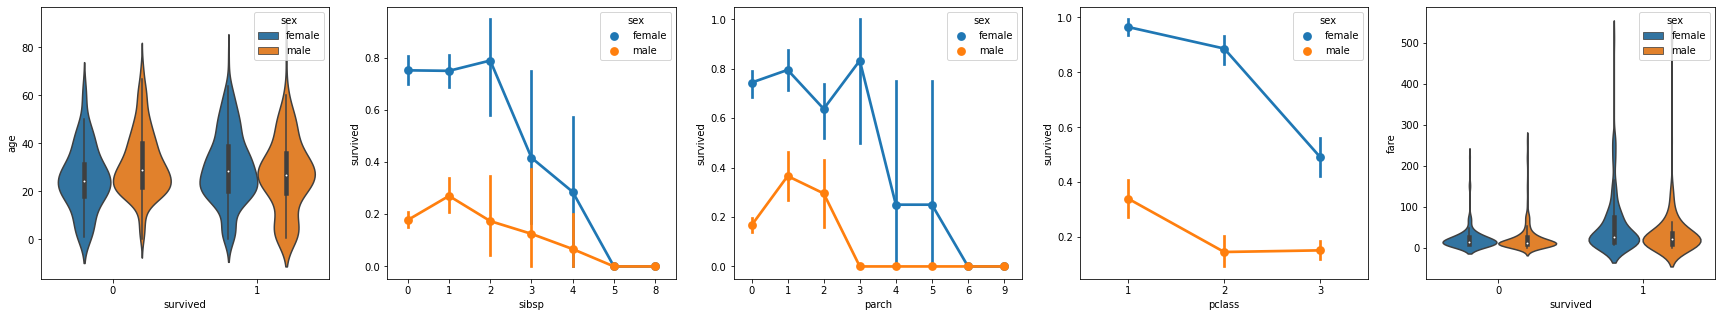

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axs = plt.subplots(ncols=5, figsize=(30,5))
sns.violinplot(x="survived", y="age", hue="sex", data=data, ax=axs[0])
sns.pointplot(x="sibsp", y="survived", hue="sex", data=data, ax=axs[1])
sns.pointplot(x="parch", y="survived", hue="sex", data=data, ax=axs[2])
sns.pointplot(x="pclass", y="survived", hue="sex", data=data, ax=axs[3])
sns.violinplot(x="survived", y="fare", hue="sex", data=data, ax=axs[4])

Calculate how numeric properties correlate to survival.

In [26]:
data.replace({'male': 1, 'female': 0}, inplace= True)
data.corr().abs()[["survived"]]

,survived
pclass,0.312469
survived,1.000000
sex,0.528693
age,0.055513
sibsp,0.027825
parch,0.082660
fare,0.244265


Hypotehsize that `sibsp` and `parch` are related in how they affect survivability, and group them into a new column called "relatives" to see whether the combination of them has a higher correlation to survivability.

In [27]:
data['relatives'] = data.apply(lambda row: int((row['sibsp'] + row['parch']) > 0), axis=1)
data.corr().abs()[["survived"]]

,survived
pclass,0.312469
survived,1.000000
sex,0.528693
age,0.055513
sibsp,0.027825
parch,0.082660
fare,0.244265
relatives,0.201719


Drop from the dataset the low value `sibsp` and `parch` columns, as well as any rows that had **NaN** values, to end up with a dataset that can be used for training a model.

> Although age had a low direct correlation, it was kept because it seems reasonable that it might have correlation in conjunction with other inputs.

In [28]:
data = data[['sex', 'pclass', 'age', 'relatives', 'fare', 'survived']].dropna()